# Nashville Housing EDA and Visualisations 

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [16]:
df = pd.read_csv('CleanNashvilleHousing.csv')

In [17]:
df.head()

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,OwnerSplitAddress,OwnerSplitCity,OwnerSplitState,bedroomscategory,fullbathcategory
0,2045.0,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000.0,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",...,235700.0,1986.0,3.0,3.0,0.0,1808 FOX CHASE DR,GOODLETTSVILLE,TN,3,3
1,16918.0,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000.0,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",...,319000.0,1998.0,3.0,3.0,2.0,1832 FOX CHASE DR,GOODLETTSVILLE,TN,3,3
2,54582.0,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000.0,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",...,298000.0,1987.0,4.0,3.0,0.0,1864 FOX CHASE DR,GOODLETTSVILLE,TN,4,3
3,43070.0,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000.0,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",...,197300.0,1985.0,3.0,3.0,0.0,1853 FOX CHASE DR,GOODLETTSVILLE,TN,3,3
4,22714.0,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000.0,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",...,202300.0,1984.0,4.0,3.0,0.0,1829 FOX CHASE DR,GOODLETTSVILLE,TN,4,3


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56376 entries, 0 to 56375
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UniqueID           56373 non-null  float64
 1   ParcelID           56373 non-null  object 
 2   LandUse            56376 non-null  object 
 3   PropertyAddress    56373 non-null  object 
 4   SaleDate           56373 non-null  object 
 5   SalePrice          56368 non-null  float64
 6   LegalReference     56370 non-null  object 
 7   SoldAsVacant       56373 non-null  object 
 8   OwnerName          25215 non-null  object 
 9   OwnerAddress       25969 non-null  object 
 10  Acreage            25969 non-null  float64
 11  TaxDistrict        25969 non-null  object 
 12  LandValue          25969 non-null  float64
 13  BuildingValue      25969 non-null  float64
 14  TotalValue         25969 non-null  float64
 15  YearBuilt          24118 non-null  float64
 16  Bedrooms           241

In [18]:
df.mean()

UniqueID          28338.280524
SalePrice        327524.994518
Acreage               0.497580
LandValue         69144.981555
BuildingValue    160888.716354
TotalValue       232558.966499
YearBuilt          1963.731653
Bedrooms              3.090246
FullBath              1.886339
HalfBath              0.283912
dtype: float64

In [19]:
df.min()

UniqueID                                            0.0
LandUse          APARTMENT: LOW RISE (BUILT SINCE 1960)
SalePrice                                          50.0
Acreage                                            0.01
LandValue                                         100.0
BuildingValue                                       0.0
TotalValue                                        100.0
YearBuilt                                        1799.0
Bedrooms                                            0.0
FullBath                                            0.0
HalfBath                                            0.0
dtype: object

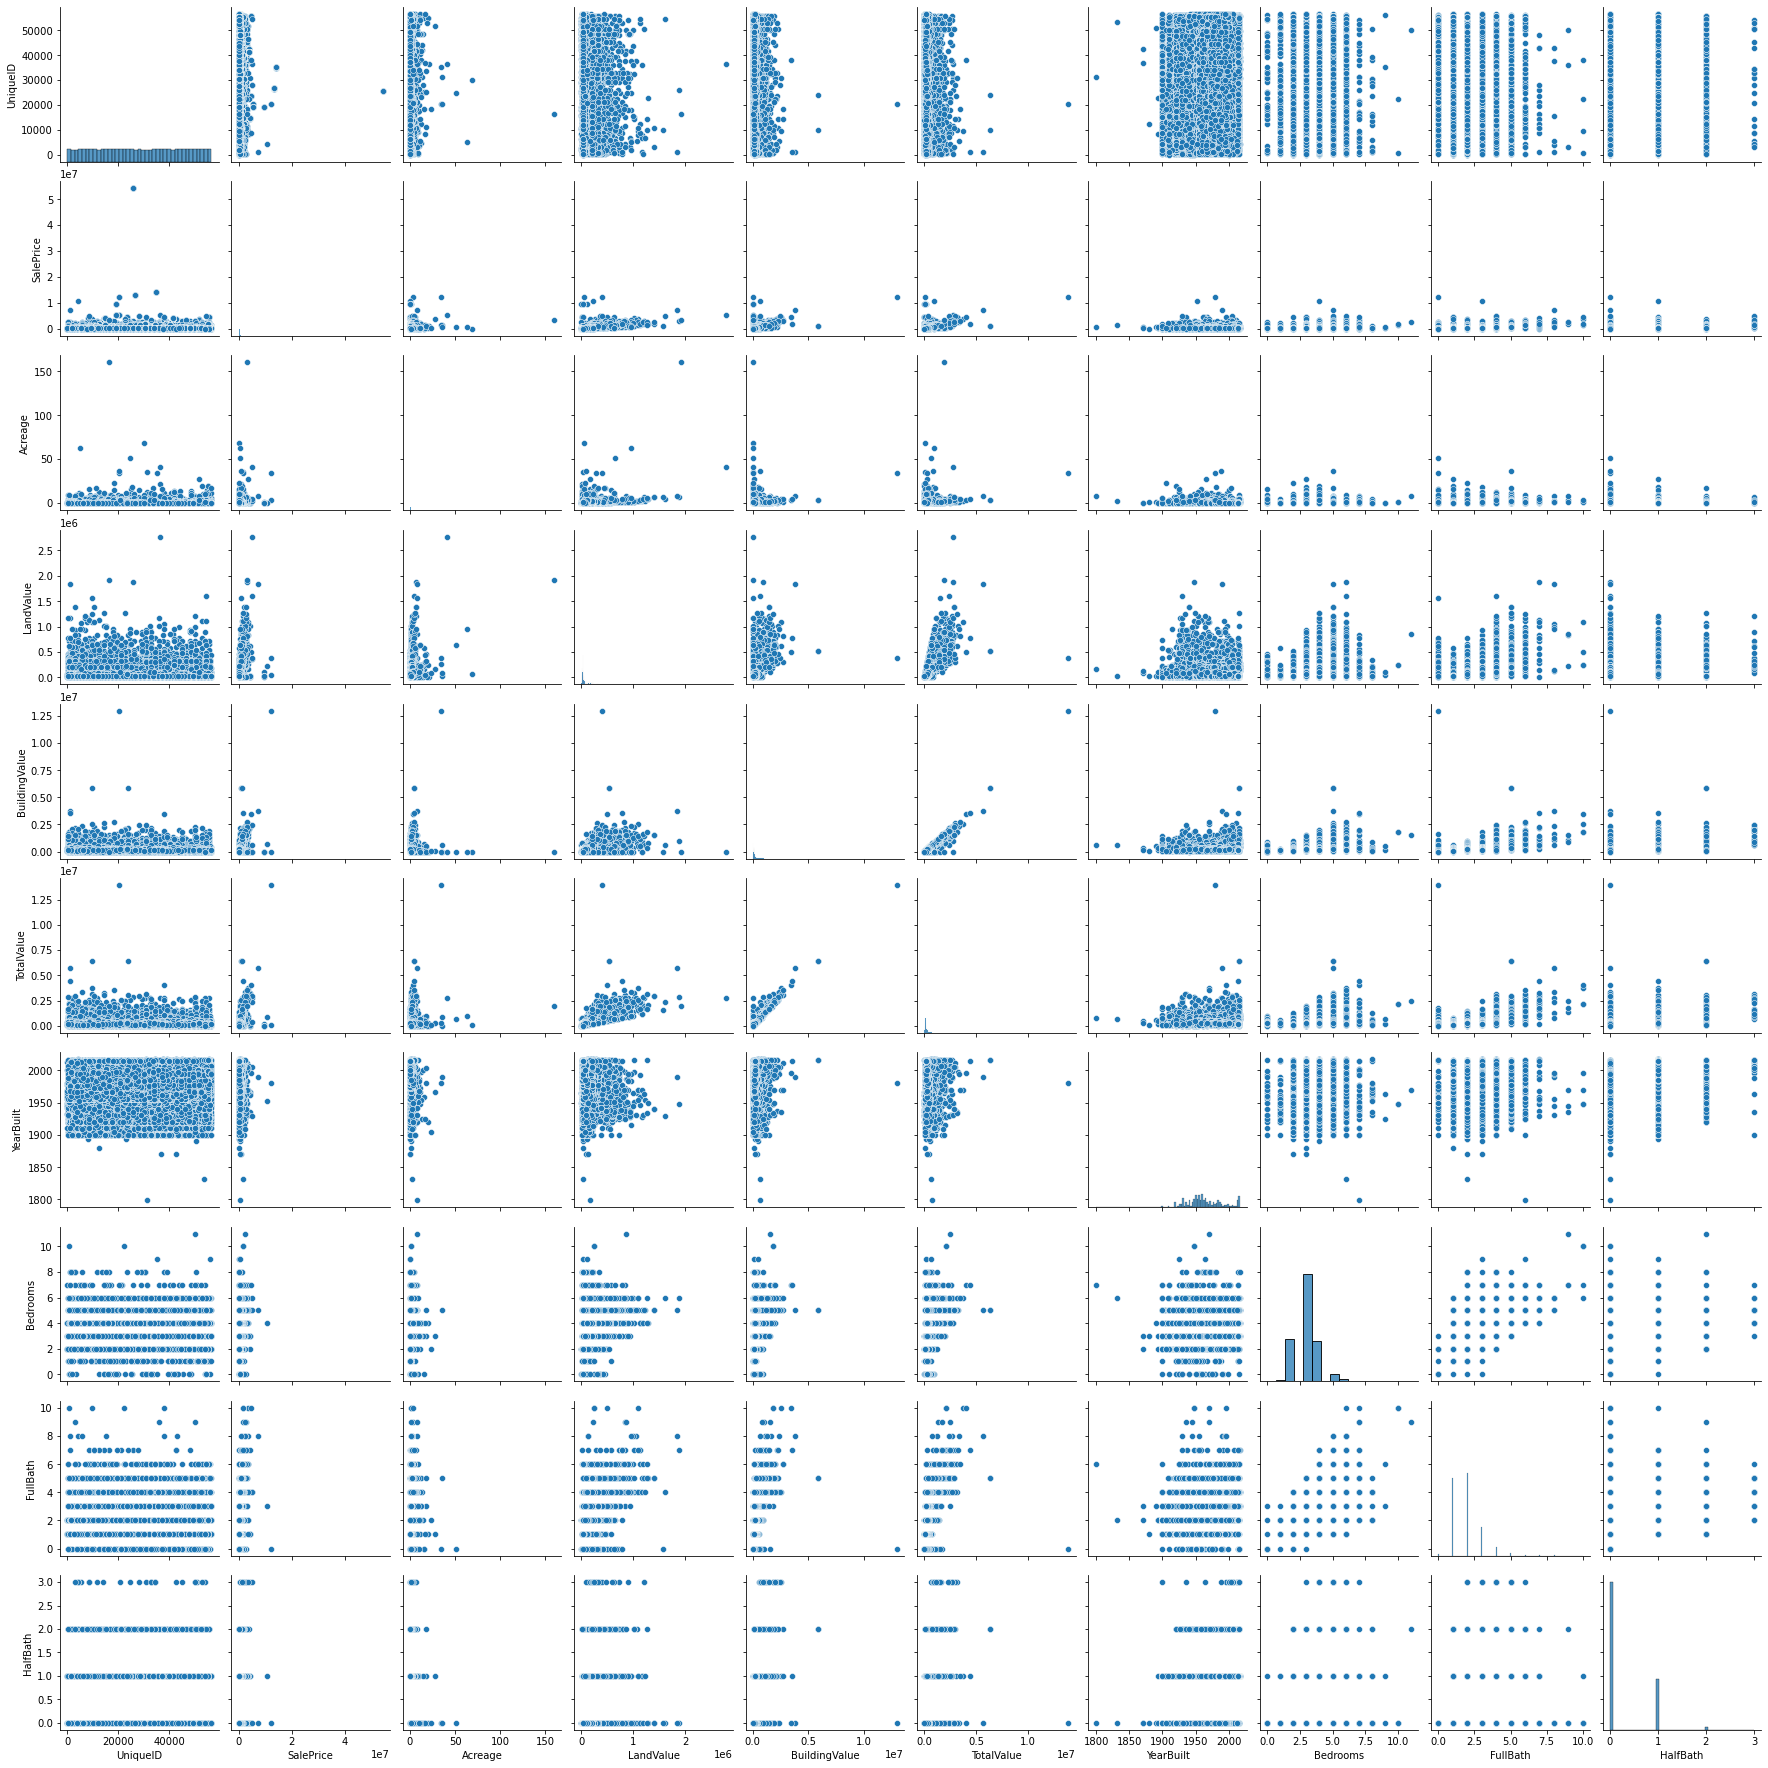

In [24]:
sns.pairplot(df)

# For each city, what type of houses has the highest sale price? 

In [62]:
plt.rcParams["figure.figsize"] = (10,5)

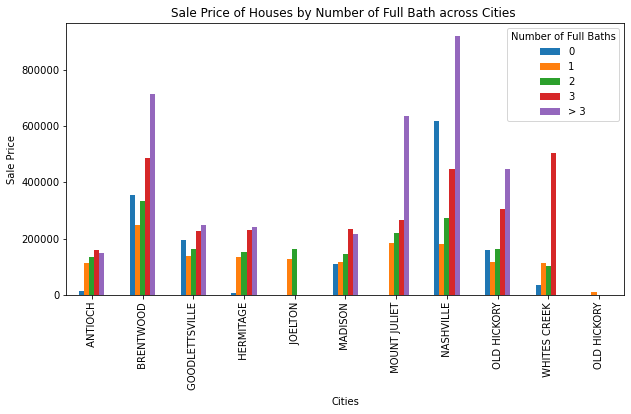

In [63]:
# Full Baths
df1 = df['SalePrice'].groupby([df['OwnerSplitCity'], df['fullbathcategory']]).mean()
df1 = df1.unstack()
df1.plot.bar()
plt.xlabel('Cities')
plt.ylabel('Sale Price')
plt.title('Sale Price of Houses by Number of Full Bath across Cities ')
plt.legend(title='Number of Full Baths', loc='upper right')

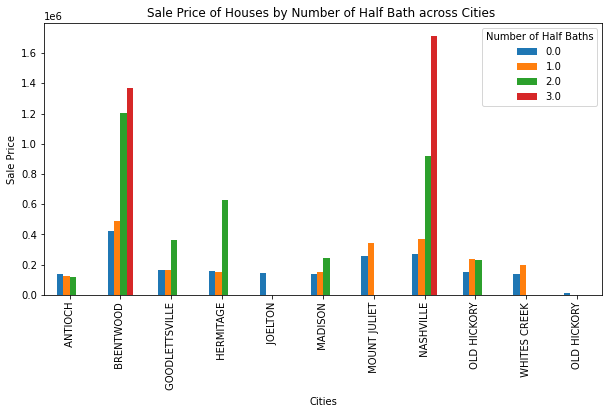

In [67]:
# Half Baths
df2 = df['SalePrice'].groupby([df['OwnerSplitCity'], df['HalfBath']]).mean()
df2 = df2.unstack()
df2.plot.bar()
plt.xlabel('Cities')
plt.ylabel('Sale Price')
plt.title('Sale Price of Houses by Number of Half Bath across Cities ')
plt.legend(title='Number of Half Baths', loc='upper right')

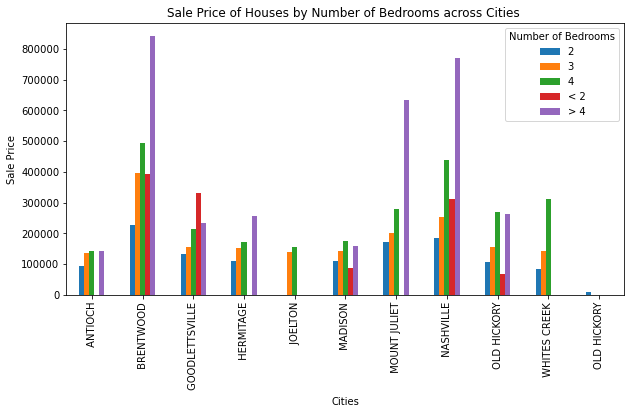

In [69]:
# Bedrooms
df3 = df['SalePrice'].groupby([df['OwnerSplitCity'], df['bedroomscategory']]).mean()
df3 = df3.unstack()
df3.plot.bar()
plt.xlabel('Cities')
plt.ylabel('Sale Price')
plt.title('Sale Price of Houses by Number of Bedrooms across Cities ')
plt.legend(title='Number of Bedrooms', loc='upper right')

# How does the housing industry changes over time?

<AxesSubplot:xlabel='SaleDate'>

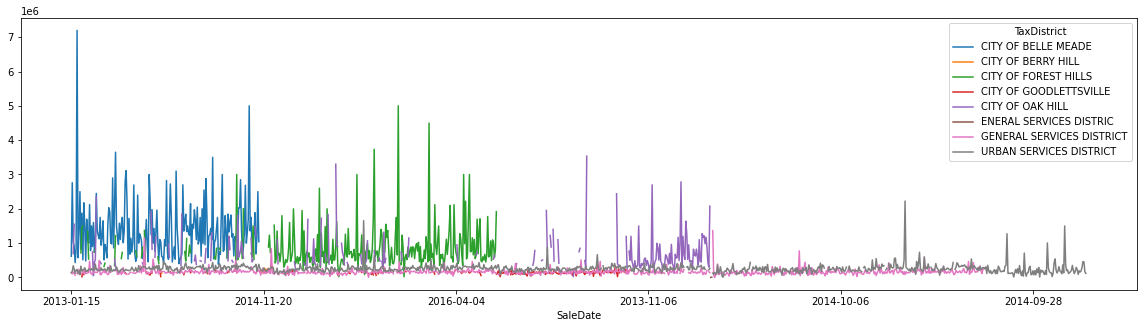

In [141]:
plt.rcParams["figure.figsize"] = (20,5)
df4 = df['SalePrice'].groupby([df['TaxDistrict'], df['SaleDate']]).mean()
df4 = df4.unstack()
df4.T.plot()

# Does the price sold and value of housing changes depending on the year it is built?

Text(0.5, 1.0, 'Total value vs price sold of houses for each year built')

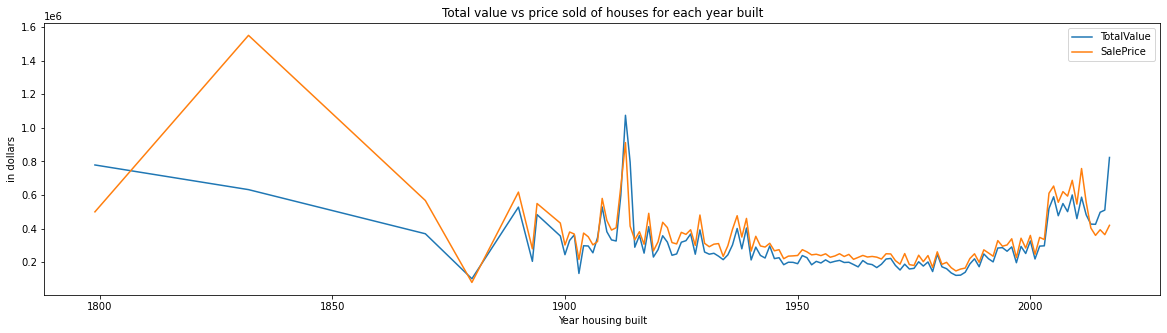

In [159]:
df5 = df.groupby(['YearBuilt']).mean()
df5 = df5[['TotalValue', 'SalePrice']]
df5.plot()
plt.xlabel('Year housing built')
plt.ylabel('in dollars')
plt.title('Total value vs price sold of houses for each year built')